In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 10,6

In [2]:
data = pd.read_csv('/content/drive/MyDrive/DIGICHROME/TSLA.csv')

In [3]:
data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [4]:
data.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300
2415,2020-02-03,673.690002,786.140015,673.520020,780.000000,780.000000,47065000


In [5]:
# Check unique values in each column
for column in data.columns:
    print(f"Unique values in column '{column}':")
    print(data[column].unique())


Unique values in column 'Date':
['2010-06-29' '2010-06-30' '2010-07-01' ... '2020-01-30' '2020-01-31'
 '2020-02-03']
Unique values in column 'Open':
[ 19.        25.790001  25.       ... 632.419983 640.       673.690002]
Unique values in column 'High':
[ 25.        30.42      25.92     ... 650.880005 653.       786.140015]
Unique values in column 'Low':
[ 17.540001  23.299999  20.27     ... 618.       632.52002  673.52002 ]
Unique values in column 'Close':
[ 23.889999  23.83      21.959999 ... 640.809998 650.570007 780.      ]
Unique values in column 'Adj Close':
[ 23.889999  23.83      21.959999 ... 640.809998 650.570007 780.      ]
Unique values in column 'Volume':
[18766300 17187100  8218800 ... 29005700 15719300 47065000]


In [6]:
# Assuming 'data' is your DataFrame and 'Date_Column' is the correct column containing datetime strings
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')

In [7]:
#data["Date"] = pd.to_datetime(data["Date"])

In [8]:
print(f'Dataframe contains stock prices between{data.Date.min()} {data.Date.max()}')
print(f'Total days = {(data.Date.max() - data.Date.min()).days} days')

Dataframe contains stock prices between2010-06-29 00:00:00 2020-02-03 00:00:00
Total days = 3506 days


<Axes: >

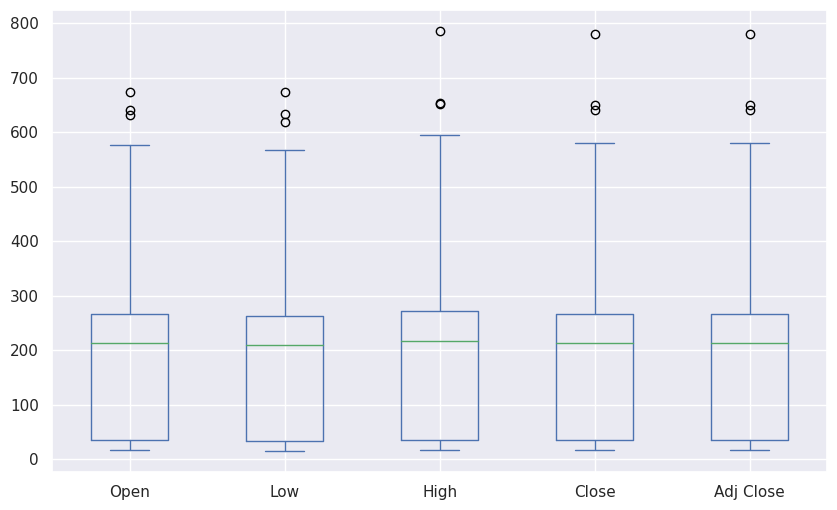

In [9]:

data[['Open','Low','High','Close','Adj Close']].plot(kind='box')

In [10]:
# Calculate quartiles for each column
Q1 = data['Close'].quantile(0.25)
Q3 = data['Close'].quantile(0.75)
IQR = Q3 - Q1
# Define lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Identify and remove outliers
outliers = ((data['Close'] < lower_bound) | (data['Close'] > upper_bound))
data_no_outliers = data[outliers]

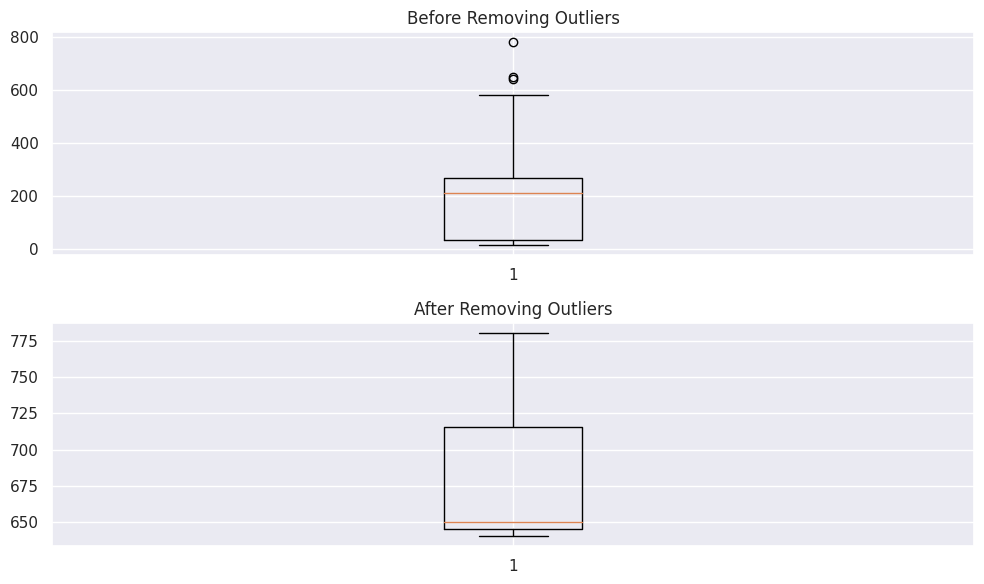

In [11]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.boxplot(data['Close'])
plt.title('Before Removing Outliers')
plt.subplot(2, 1, 2)
plt.boxplot(data_no_outliers['Close'])
plt.title('After Removing Outliers')
plt.tight_layout()
plt.show()

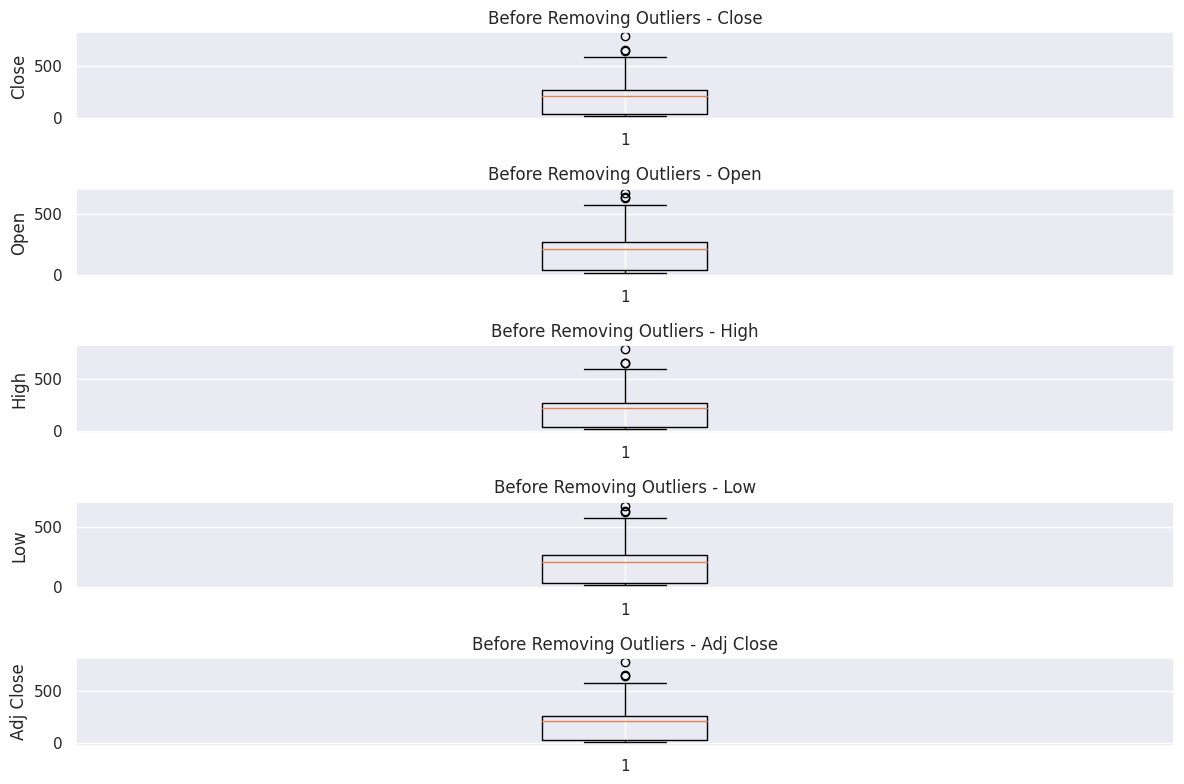

In [12]:
import matplotlib.pyplot as plt

# Assuming data_no_outliers is a DataFrame containing data without outliers
# Assuming you have multiple columns you want to plot

columns_to_plot = ['Close', 'Open', 'High', 'Low','Adj Close']  #columns

plt.figure(figsize=(12, 8))

# Iterate through each column and create subplots
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(len(columns_to_plot), 1, i)
    plt.boxplot(data[col])
    plt.title('Before Removing Outliers - ' + col)
    plt.ylabel(col)

plt.tight_layout()
plt.show()

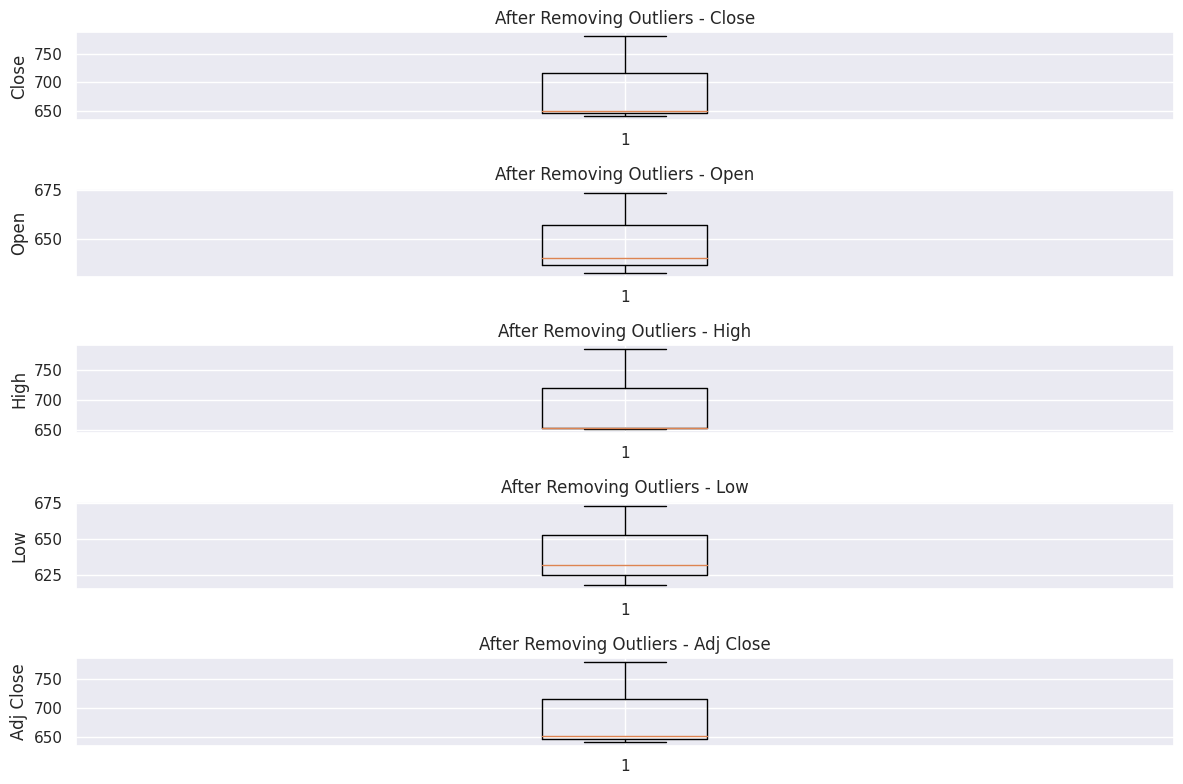

In [13]:
import matplotlib.pyplot as plt

# Assuming data_no_outliers is a DataFrame containing data without outliers
# Assuming you have multiple columns you want to plot

columns_to_plot = ['Close', 'Open', 'High', 'Low','Adj Close']  # Example columns

plt.figure(figsize=(12, 8))

# Iterate through each column and create subplots
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(len(columns_to_plot), 1, i)
    plt.boxplot(data_no_outliers[col])
    plt.title('After Removing Outliers - ' + col)
    plt.ylabel(col)

plt.tight_layout()
plt.show()

In [14]:
import plotly.graph_objects as go
from plotly.offline import iplot

#Setting the layout for our plot
layout = go.Layout(
    title='Stock Price of Tesla',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

data=[{'x':data['Date'], 'y':data['Close']}]
plot=go.Figure(data=data,layout=layout)
plt.show()

In [15]:
iplot(plot)

In [16]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/DIGICHROME/TSLA.csv',
                   parse_dates = ['Date'],
                   index_col = ['Date'])

In [17]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [18]:
# how many samples do we have
len(data)

2416

In [19]:
#closing price for each day
Stock_prices = pd.DataFrame(data['Close']).rename(columns={'Close':"Close Price"})
Stock_prices.head()

,Close Price
Date,
2010-06-29,23.889999
2010-06-30,23.830000
2010-07-01,21.959999
2010-07-02,19.200001
2010-07-06,16.110001


In [20]:
Stock_prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2416 entries, 2010-06-29 to 2020-02-03
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Close Price  2416 non-null   float64
dtypes: float64(1)
memory usage: 37.8 KB


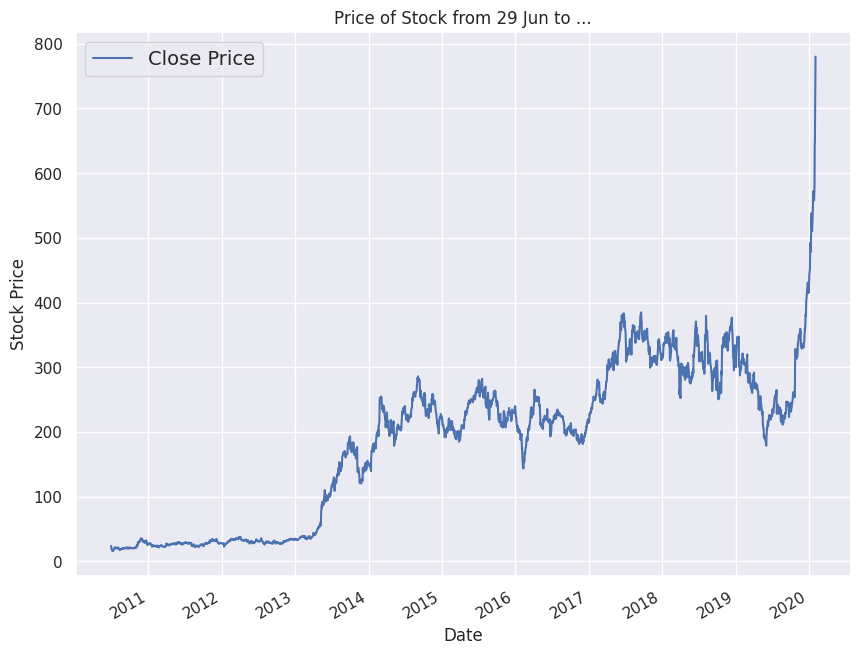

In [21]:
## create a visual of this data
import matplotlib.pyplot as plt
Stock_prices.plot(figsize=(10, 8))
plt.ylabel("Stock Price")
plt.title("Price of Stock from 29 Jun to ...")
plt.legend(fontsize=14);

**Determine Statistics**

In [22]:
#Determing rolling statistics
rolmean = Stock_prices.rolling(window=12).mean()

rolstd = Stock_prices.rolling(window=12).std()
print(rolmean ,rolstd)

            Close Price
Date                   
2010-06-29          NaN
2010-06-30          NaN
2010-07-01          NaN
2010-07-02          NaN
2010-07-06          NaN
...                 ...
2020-01-28   538.510002
2020-01-29   547.080002
2020-01-30   556.742503
2020-01-31   566.130005
2020-02-03   587.921672

[2416 rows x 1 columns]             Close Price
Date                   
2010-06-29          NaN
2010-06-30          NaN
2010-07-01          NaN
2010-07-02          NaN
2010-07-06          NaN
...                 ...
2020-01-28    29.686925
2020-01-29    25.179950
2020-01-30    35.860265
2020-01-31    44.248632
2020-02-03    73.429368

[2416 rows x 1 columns]


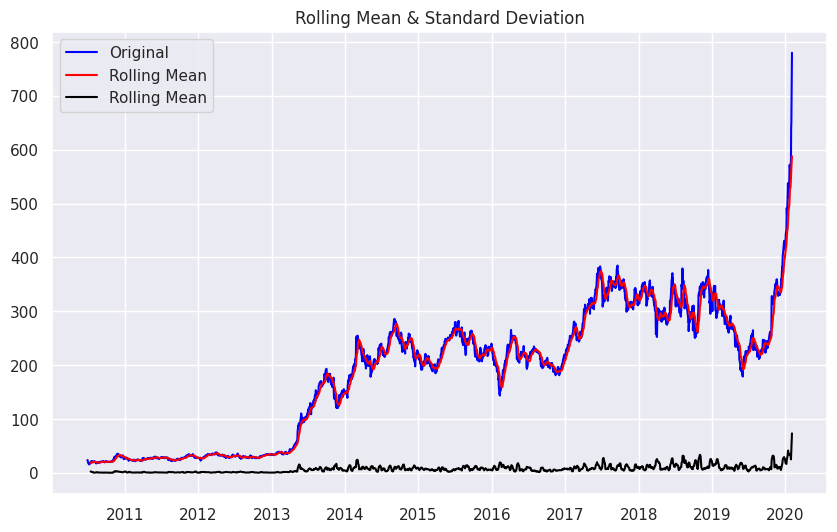

In [23]:
#Plot rolling statistics
orig = plt.plot(Stock_prices,color='blue',label='Original')
mean = plt.plot(rolmean,color='red',label= 'Rolling Mean')
std = plt.plot(rolstd, color='black',label='Rolling Mean')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [24]:
#Perform Dickey Fuller test:
from statsmodels.tsa.stattools import adfuller

In [25]:
print('Results of Dickey-Fuller Test:')
datatest = adfuller(Stock_prices['Close Price'],autolag='AIC')

dataoutput = pd.Series(datatest[0:4],index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key , value in datatest[4].items():
  dataoutput['Critical Value (%s)'%key] = value

print(dataoutput)

Results of Dickey-Fuller Test:
Test Statistic                    1.400069
p-value                           0.997114
#Lags Used                       18.000000
Number of Observations Used    2397.000000
Critical Value (1%)              -3.433081
Critical Value (5%)              -2.862747
Critical Value (10%)             -2.567412
dtype: float64


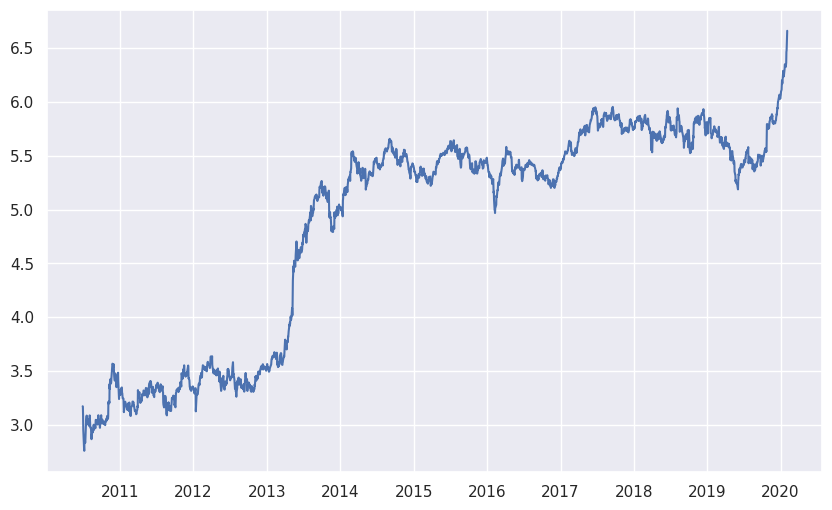

In [26]:
#Estimating trend
Stock_prices_logScale = np.log(Stock_prices)
plt.plot(Stock_prices_logScale)

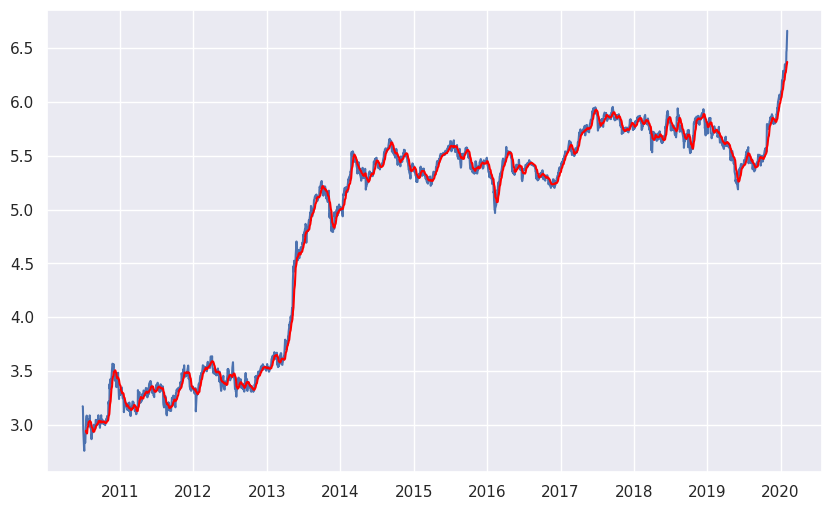

In [27]:
movingAverage = Stock_prices_logScale.rolling(window=12).mean()
movingSTD = Stock_prices_logScale.rolling(window=12).std()
plt.plot(Stock_prices_logScale)
plt.plot(movingAverage,color='red')

In [28]:
StockpricesLogScaleMinusMovingAverage = Stock_prices_logScale - movingAverage
StockpricesLogScaleMinusMovingAverage.head(12)

#Remove Nan values
StockpricesLogScaleMinusMovingAverage.dropna(inplace=True)
StockpricesLogScaleMinusMovingAverage.head(10)

,Close Price
Date,
2010-07-15,0.043837
2010-07-16,0.093037
2010-07-19,0.159749
2010-07-20,0.089977
2010-07-21,0.081715
2010-07-22,0.097475
2010-07-23,0.086338
2010-07-26,0.055053
2010-07-27,0.021910


In [29]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

  #Determing rolling statistics
  movingAverage = timeseries.rolling(window=12).mean()
  movingSTD = timeseries.rolling(window=12).std()

  #plot rolling statistics
  orig = plt.plot(timeseries,color='blue',label='Original')
  mean = plt.plot(movingAverage,color='red',label= 'Rolling Mean')
  std = plt.plot(movingSTD, color='black',label='Rolling STD')
  plt.legend(loc='best')
  plt.title('Rolling Mean & Standard Deviation')
  plt.show(block=False)

  #Perform Dickey-Fuller test:
  print('Results of Dickey-Fuller Test:')
  datatest = adfuller(timeseries['Close Price'],autolag='AIC')

  dataoutput = pd.Series(datatest[0:4],index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
  for key , value in datatest[4].items():
      dataoutput['Critical Value (%s)'%key] = value

  print(dataoutput)

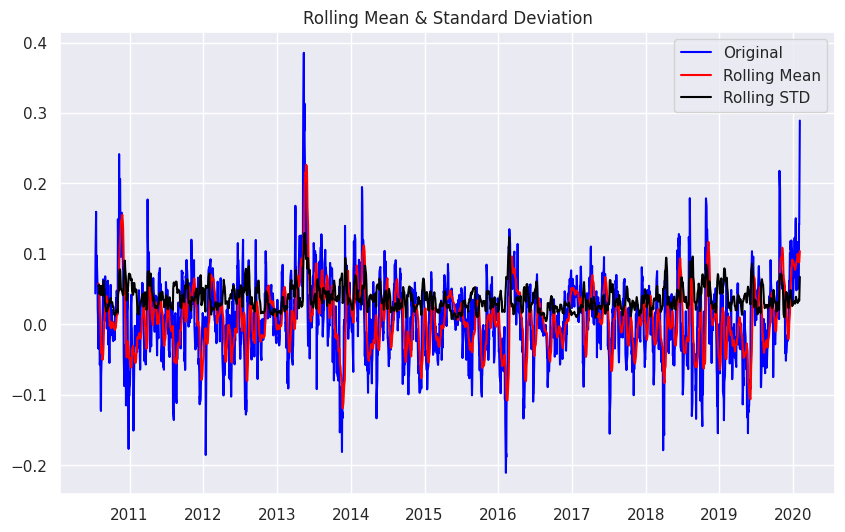

Results of Dickey-Fuller Test:
Test Statistic                -9.716740e+00
p-value                        9.784263e-17
#Lags Used                     1.100000e+01
Number of Observations Used    2.393000e+03
Critical Value (1%)           -3.433086e+00
Critical Value (5%)           -2.862749e+00
Critical Value (10%)          -2.567413e+00
dtype: float64


In [30]:
test_stationarity(StockpricesLogScaleMinusMovingAverage)

**Weighted Moving Average**

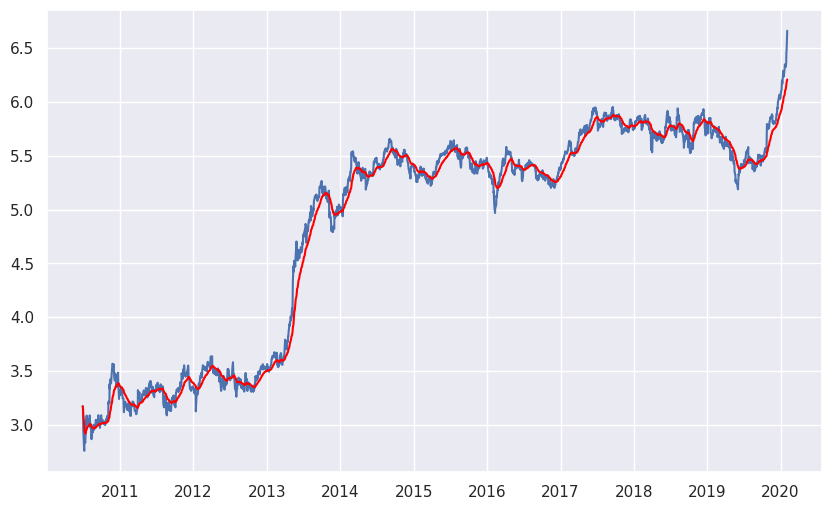

In [31]:
exponentialDecayweightedAverage = Stock_prices_logScale.ewm(halflife=12,min_periods=0,adjust=True).mean()
plt.plot(Stock_prices_logScale)
plt.plot(exponentialDecayweightedAverage, color='red')

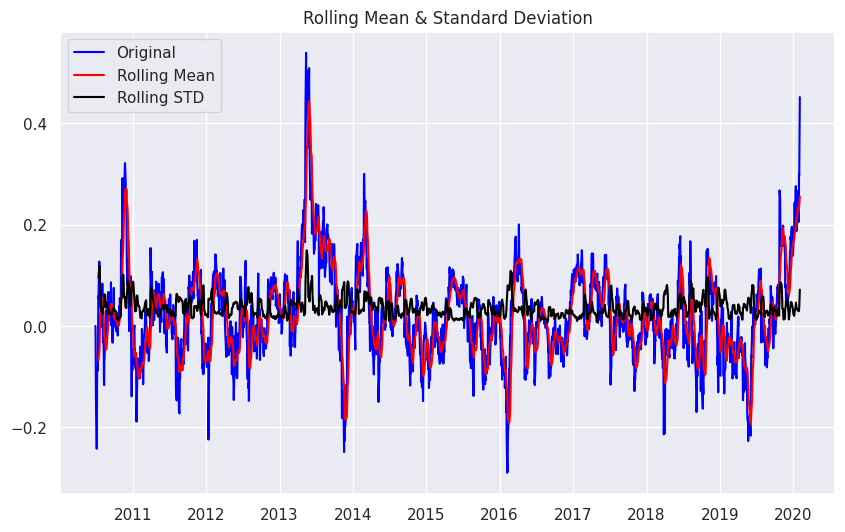

Results of Dickey-Fuller Test:
Test Statistic                -7.764595e+00
p-value                        9.260120e-12
#Lags Used                     0.000000e+00
Number of Observations Used    2.415000e+03
Critical Value (1%)           -3.433061e+00
Critical Value (5%)           -2.862738e+00
Critical Value (10%)          -2.567408e+00
dtype: float64


In [32]:
StockpricesLogScaleMinusMovingexponentialDecayweightedAverage =Stock_prices_logScale - exponentialDecayweightedAverage
test_stationarity(StockpricesLogScaleMinusMovingexponentialDecayweightedAverage)

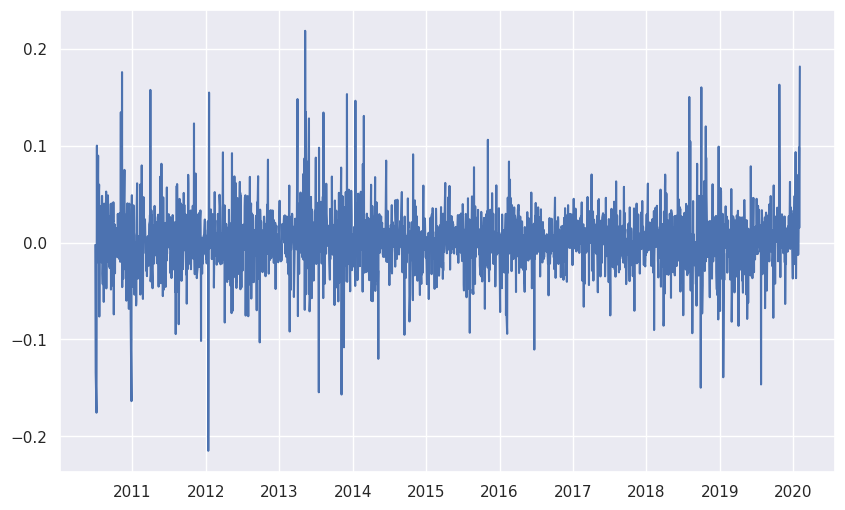

In [33]:
StockpriceLogDiffShifting = Stock_prices_logScale - Stock_prices_logScale.shift()
plt.plot(StockpriceLogDiffShifting)

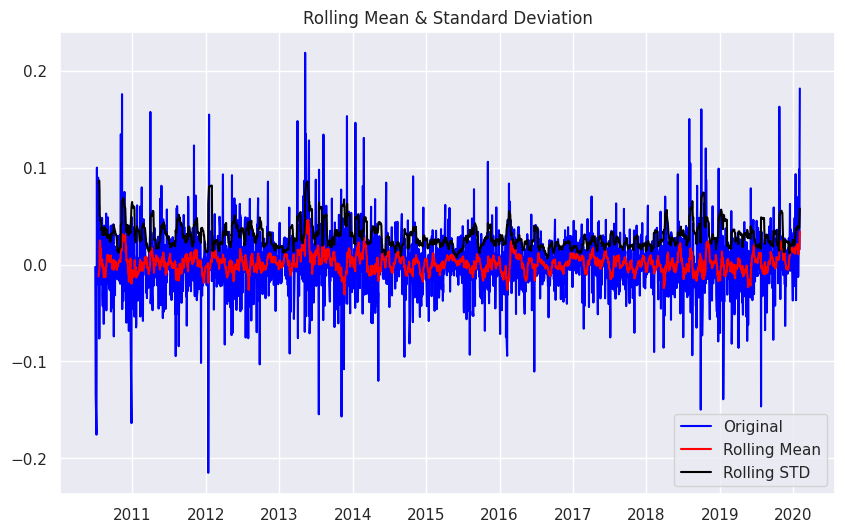

Results of Dickey-Fuller Test:
Test Statistic                  -48.272207
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    2414.000000
Critical Value (1%)              -3.433062
Critical Value (5%)              -2.862738
Critical Value (10%)             -2.567408
dtype: float64


In [34]:
StockpriceLogDiffShifting.dropna(inplace=True)
test_stationarity(StockpriceLogDiffShifting)

**Decomposition**

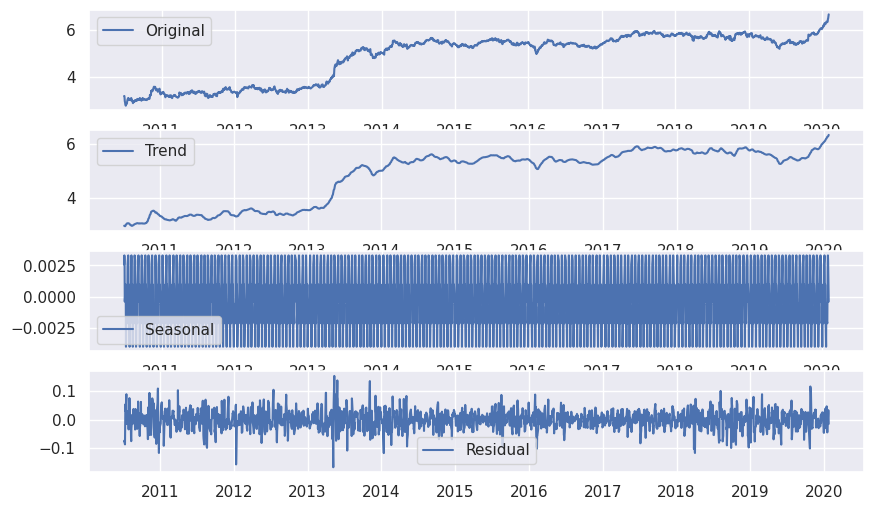

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Convert the index to datetime

decomposition = seasonal_decompose(Stock_prices_logScale,period=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(Stock_prices_logScale, label = 'Original')
plt.legend(loc = 'best')

plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')

plt.subplot(413)
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')

plt.subplot(414)
plt.plot(residual, label = 'Residual')
plt.legend(loc = 'best')

decomposedLogData = residual
decomposedLogData.dropna(inplace=True)



In [36]:
#decomposedLogData = residual
#decomposedLogData.dropna(inplace=True)
#test_stationarity(decomposedLogData)

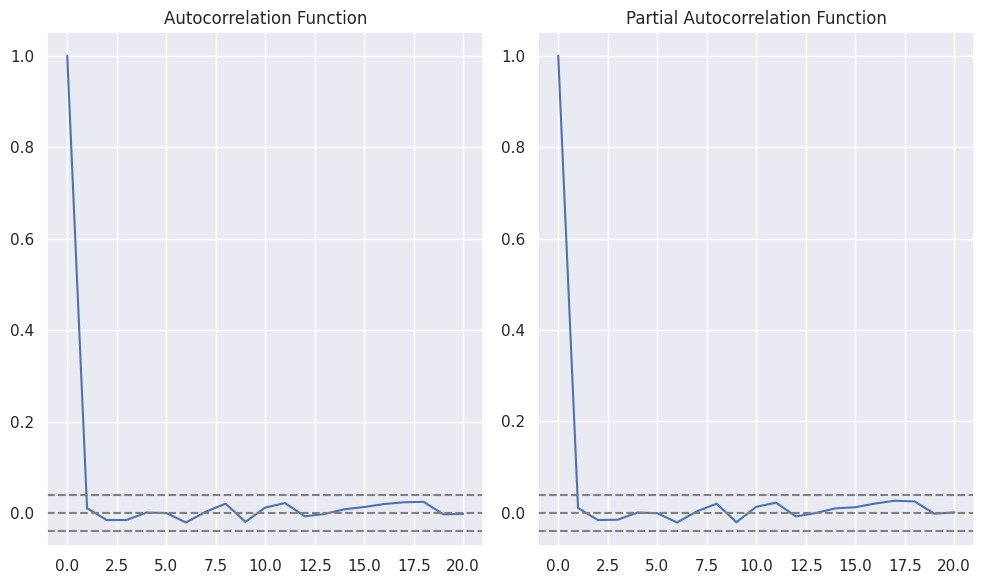

In [37]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf,pacf

lag_acf = acf(StockpriceLogDiffShifting,nlags=20)
lag_pacf = pacf(StockpriceLogDiffShifting,nlags=20,method = 'ols')

#plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y= -1.96/np.sqrt(len(StockpriceLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(StockpriceLogDiffShifting)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#plot ACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y= -1.96/np.sqrt(len(StockpriceLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(StockpriceLogDiffShifting)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



Plotting AR model


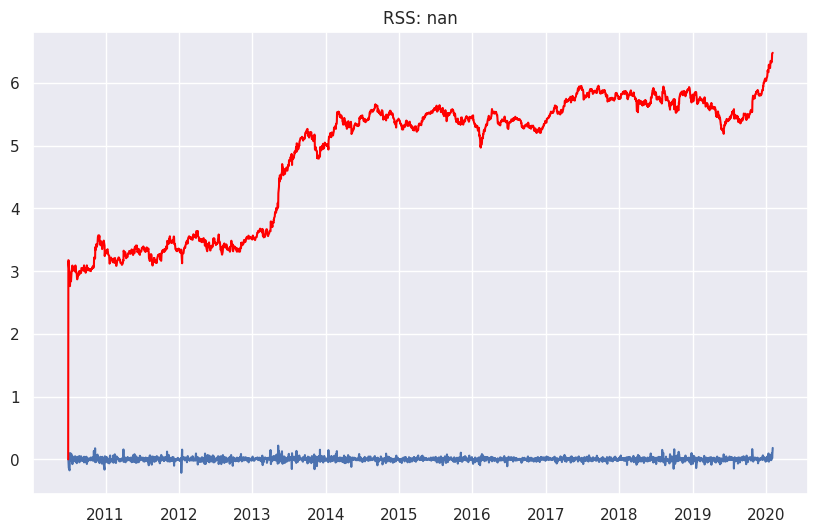

In [38]:
from statsmodels.tsa.arima.model import ARIMA

#AR MODEL
model = ARIMA(Stock_prices_logScale,order=(1,1,1))
results_AR = model.fit()
plt.plot(StockpriceLogDiffShifting)
plt.plot(results_AR.fittedvalues,color='red')
plt.title('RSS: %.4f'% sum(results_AR.fittedvalues-StockpriceLogDiffShifting["Close Price"])**2)
print('Plotting AR model')


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



Plotting MA model


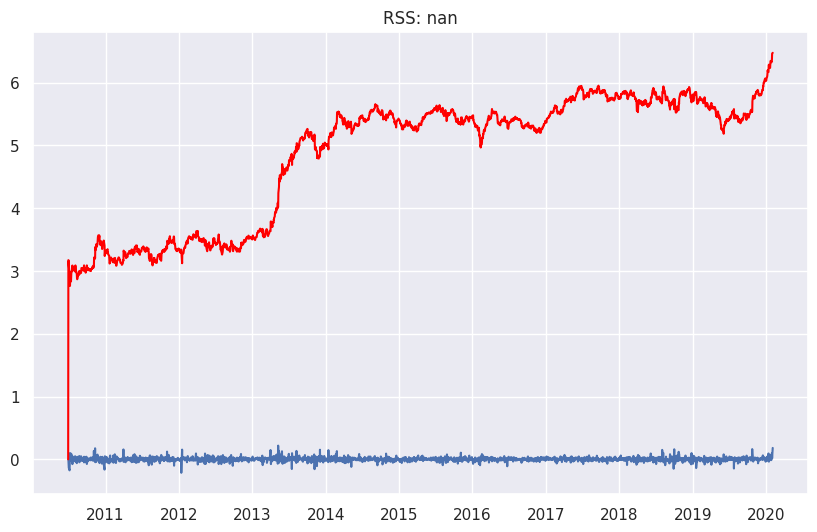

In [39]:
#MA model
model = ARIMA(Stock_prices_logScale,order=(2,1,2))
results_MA = model.fit()
plt.plot(StockpriceLogDiffShifting)
plt.plot(results_MA.fittedvalues,color='red')
plt.title('RSS: %.4f'% sum(results_MA.fittedvalues-StockpriceLogDiffShifting["Close Price"])**2)
print('Plotting MA model')


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



Text(0.5, 1.0, 'RSS: nan')

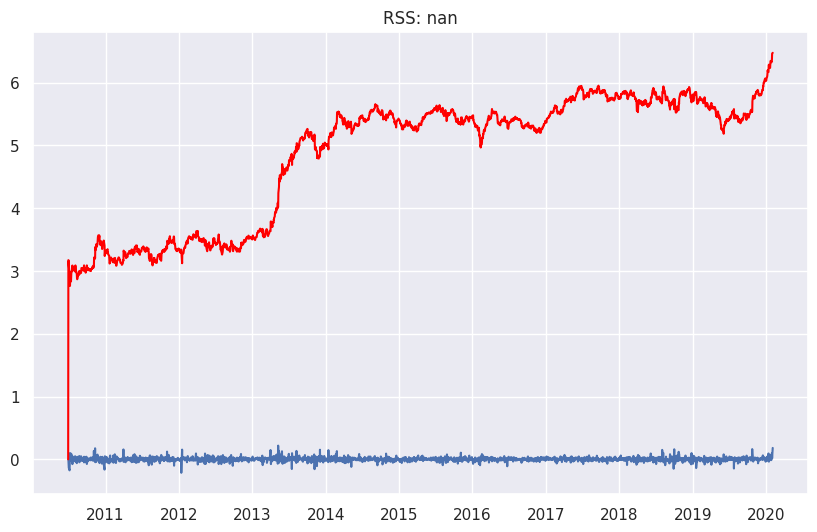

In [40]:
model = ARIMA(Stock_prices_logScale,order=(2,1,2))
results_ARIMA = model.fit()
plt.plot(StockpriceLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues,color='red')
plt.title('RSS: %.4f'% sum(results_ARIMA.fittedvalues-StockpriceLogDiffShifting["Close Price"])**2)

In [41]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues,copy=True)
print(predictions_ARIMA_diff.head())

Date
2010-06-29    0.000000
2010-06-30    3.173460
2010-07-01    3.170921
2010-07-02    3.088446
2010-07-06    2.954585
dtype: float64


In [42]:
#Convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Date
2010-06-29     0.000000
2010-06-30     3.173460
2010-07-01     6.344381
2010-07-02     9.432827
2010-07-06    12.387411
dtype: float64


In [43]:
predictions_ARIMA_log = pd.Series(Stock_prices_logScale['Close Price'].iloc[0], index=Stock_prices_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()


Date
2010-06-29     3.173460
2010-06-30     6.346920
2010-07-01     9.517841
2010-07-02    12.606286
2010-07-06    15.560871
dtype: float64

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning:

overflow encountered in exp



/usr/local/lib/python3.10/dist-packages/matplotlib/ticker.py:2094: RuntimeWarning:

overflow encountered in multiply



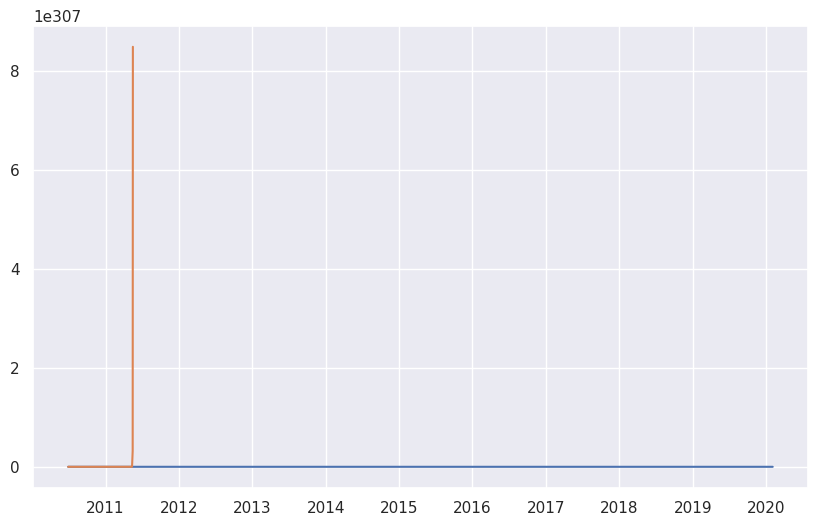

In [44]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(Stock_prices)
plt.plot(predictions_ARIMA)

In [45]:
#predictions_ARIMA_log_clipped = np.clip(predictions_ARIMA_log, a_min=None, a_max=100)  # Adjust the maximum value as needed
#predictions_ARIMA = np.exp(predictions_ARIMA_log_clipped)
#plt.plot(predictions_ARIMA_log_clipped)
#plt.plot(predictions_ARIMA)

In [46]:
Stock_prices_logScale

,Close Price
Date,
2010-06-29,3.173460
2010-06-30,3.170945
2010-07-01,3.089223
2010-07-02,2.954910
2010-07-06,2.779440
...,...
2020-01-28,6.340183
2020-01-29,6.364734
2020-01-30,6.462733


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



<Figure size 1200x600 with 0 Axes>

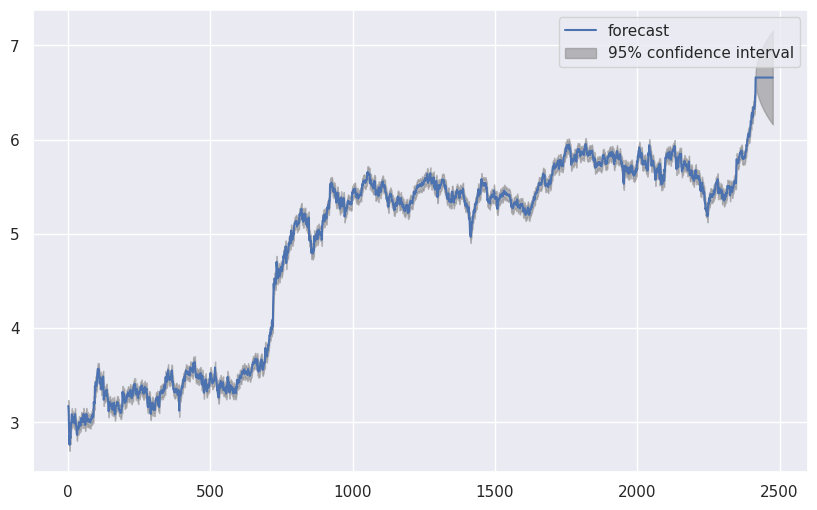

In [47]:
from statsmodels.graphics.tsaplots import plot_predict

# Assuming 'results_ARIMA' is the fitted ARIMA model
fig = plt.figure(figsize=(12, 6))
plot_predict(results_ARIMA, start=1, end=2476) #2416 rows we have so we predicted 5 years(60 months) so (60+2416=2476)
plt.show()


In [52]:
results_ARIMA.forecast(steps=60)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



2416    6.660259
2417    6.658481
2418    6.657291
2419    6.657745
2420    6.658537
2421    6.658610
2422    6.658230
2423    6.658044
2424    6.658168
2425    6.658312
2426    6.658305
2427    6.658227
2428    6.658201
2429    6.658231
2430    6.658256
2431    6.658250
2432    6.658235
2433    6.658232
2434    6.658239
2435    6.658243
2436    6.658241
2437    6.658238
2438    6.658238
2439    6.658240
2440    6.658240
2441    6.658240
2442    6.658239
2443    6.658239
2444    6.658240
2445    6.658240
2446    6.658240
2447    6.658239
2448    6.658239
2449    6.658240
2450    6.658240
2451    6.658239
2452    6.658239
2453    6.658239
2454    6.658239
2455    6.658239
2456    6.658239
2457    6.658239
2458    6.658239
2459    6.658239
2460    6.658239
2461    6.658239
2462    6.658239
2463    6.658239
2464    6.658239
2465    6.658239
2466    6.658239
2467    6.658239
2468    6.658239
2469    6.658239
2470    6.658239
2471    6.658239
2472    6.658239
2473    6.658239
2474    6.6582